In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [2]:
df = pd.read_csv('zipnames.csv')

In [3]:
df = pd.DataFrame(df)

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [5]:
df = df[['Date', 'average_listing_price', 'zip_name']]

In [6]:
df

,Date,average_listing_price,zip_name
0,2021-07-01,222849.9667,"indianapolis, in"
1,2021-07-01,463052.9505,"orlando, fl"
2,2021-07-01,851539.4189,"fort lauderdale, fl"
3,2021-07-01,525167.6452,"austin, tx"
4,2021-07-01,889984.5429,"san jose, ca"
...,...,...,...
102489,2016-07-01,274644.8800,"austin, tx"
102490,2016-07-01,105667.8819,"chicago, il"
102491,2016-07-01,451591.0714,"minneapolis, mn"
102492,2016-07-01,423535.8909,"portland, or"


In [40]:
test = df.loc[df["zip_name"] == 'oklahoma city, ok']

In [41]:
test = test.drop('zip_name', axis = 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


predicted=176303.667090, expected=229476.923800
predicted=191000.350223, expected=589339.100000
predicted=262322.113800, expected=227026.859400
predicted=263900.084388, expected=426230.303000
predicted=309250.886396, expected=679501.964300
predicted=390403.778030, expected=345299.600000
predicted=418545.817966, expected=224649.031300
predicted=419490.877323, expected=655172.200000
predicted=432847.349299, expected=187585.902400
predicted=418558.565449, expected=650219.032300
predicted=451668.344425, expected=343201.595700
predicted=393463.539502, expected=299606.769200
predicted=410832.274814, expected=415399.475000
predicted=417911.838769, expected=82842.153850
predicted=345238.258482, expected=152503.161300
predicted=326658.902059, expected=313521.428600
predicted=264331.326035, expected=133494.666700
predicted=231805.571507, expected=240794.465100
predicted=217719.647638, expected=193372.768300
predicted=187044.717980, expected=182399.523800
predicted=207417.576061, expected=331677.

predicted=314851.120387, expected=405081.824700
predicted=294961.924214, expected=220281.961000
predicted=274907.296512, expected=188419.645200
predicted=246031.710224, expected=202759.697000
predicted=229516.055703, expected=100114.500000
predicted=220101.973224, expected=610819.428600
predicted=280373.028233, expected=127232.500000
predicted=225647.004039, expected=148035.694400
predicted=245587.353881, expected=225818.327200
predicted=240536.522257, expected=179182.869700
predicted=239905.717168, expected=650683.913000
predicted=302797.666887, expected=151023.421300
predicted=235495.469840, expected=146786.606700
predicted=270731.590352, expected=77688.290510
predicted=246838.323176, expected=153228.297000
predicted=239364.673227, expected=163953.746200
predicted=202060.112269, expected=212197.275600
predicted=148472.516156, expected=552834.002600
predicted=211396.682429, expected=240070.739900
predicted=225936.442842, expected=111885.395400
predicted=252007.723660, expected=480043.

predicted=405598.574757, expected=349037.232700
predicted=355282.549316, expected=223708.959600
predicted=376862.876969, expected=463646.349700
predicted=392507.945880, expected=298098.955900
predicted=353711.233099, expected=234583.593800
predicted=353495.443387, expected=606329.227900
predicted=358992.774471, expected=579589.677400
predicted=396254.059625, expected=464420.071700
predicted=439715.459672, expected=262217.573200
predicted=413436.783662, expected=220366.536900
predicted=409042.254246, expected=908114.015700
predicted=500191.197743, expected=152767.968700
predicted=414597.211589, expected=90942.334560
predicted=368616.610448, expected=1001164.447000
predicted=432578.352756, expected=582725.383900
predicted=477934.871782, expected=313533.757300
predicted=507468.250753, expected=751337.658500
predicted=492464.208313, expected=265637.176500
predicted=509465.009540, expected=237519.333300
predicted=533551.062941, expected=136063.905200
predicted=377553.984123, expected=222438

predicted=498532.461481, expected=157640.000000
predicted=483132.111771, expected=316522.333300
predicted=441537.246858, expected=138619.434800
predicted=333270.435875, expected=117000.000000
predicted=288472.927828, expected=292332.176500
predicted=255717.689557, expected=934682.567600
predicted=320494.180759, expected=299753.836000
predicted=337373.022349, expected=381533.862600
predicted=379198.117358, expected=925709.074000
predicted=488091.360402, expected=477233.824500
predicted=549791.333044, expected=620747.982100
predicted=610987.203610, expected=112716.348700
predicted=470845.261596, expected=837370.553400
predicted=573804.185827, expected=334633.783800
predicted=527293.592799, expected=1029573.193000
predicted=575899.453007, expected=625686.471800
predicted=575707.602668, expected=307492.130600
predicted=568106.948455, expected=251491.361800
predicted=565598.375887, expected=267840.000000
predicted=477981.852345, expected=179310.191700
predicted=434123.372247, expected=38770

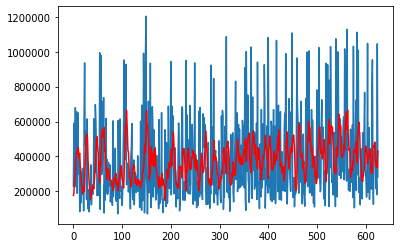

In [46]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = test.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')

In [42]:
test = test.sort_values(by = 'Date')

In [45]:
test = test.drop('Date', axis = 1)

In [47]:
df

,Date,average_listing_price,zip_name
0,2021-07-01,222849.9667,"indianapolis, in"
1,2021-07-01,463052.9505,"orlando, fl"
2,2021-07-01,851539.4189,"fort lauderdale, fl"
3,2021-07-01,525167.6452,"austin, tx"
4,2021-07-01,889984.5429,"san jose, ca"
...,...,...,...
102489,2016-07-01,274644.8800,"austin, tx"
102490,2016-07-01,105667.8819,"chicago, il"
102491,2016-07-01,451591.0714,"minneapolis, mn"
102492,2016-07-01,423535.8909,"portland, or"


In [49]:
temp = df[df.zip_name == 'oklahoma city, ok']
temp.groupby(['Date'])['average_listing_price'].mean()

Date
2016-07-01    249913.525858
2016-08-01    248370.361565
2016-09-01    246872.558355
2016-10-01    242819.225087
2016-11-01    241571.225322
                  ...      
2021-03-01    472881.286494
2021-04-01    499160.553773
2021-05-01    432219.421341
2021-06-01    387244.730876
2021-07-01    397417.416890
Name: average_listing_price, Length: 61, dtype: float64

In [55]:
temp = temp.sort_values(by = 'Date')

In [58]:
temp = temp.drop('zip_name', axis = 1)

In [59]:
temp = temp.drop('Date', axis = 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Test RMSE: 269052.413


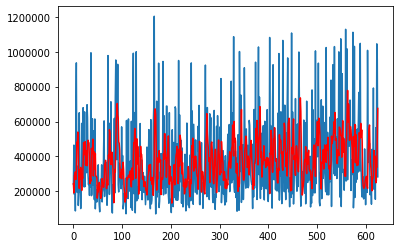

In [64]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = temp.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')

In [65]:
def arima_pred(df):
    
    for i in df['zip_name'].unique():
        temp = df[df.zip_name == i]
        temp.groupby(['Date'])['average_listing_price'].mean()
        temp = temp.sort_values(by = 'Date')
        temp = temp.drop('zip_name', axis = 1)
        temp = temp.drop('Date', axis = 1)
        curent_city = i
        X = temp.values
        size = int(len(X) * 0.66)
        train, test = X[0:size], X[size:len(X)]
        history = [x for x in train]
        predictions = list()
        # walk-forward validation
        for t in range(len(test)):
            model = ARIMA(history, order=(3,1,0))
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
            #print('predicted=%f, expected=%f' % (yhat, obs))
        # evaluate forecasts
        rmse = sqrt(mean_squared_error(test, predictions))
        print('Test RMSE for ' + str(i) + ': %.3f' % rmse)
        # plot forecasts against actual outcomes
        pyplot.plot(test)
        plt.title(str(i))
        pyplot.plot(predictions, color='red')

Test RMSE for indianapolis, in: 184340.018
Test RMSE for orlando, fl: 236894.596
Test RMSE for fort lauderdale, fl: 689955.266


KeyboardInterrupt: 

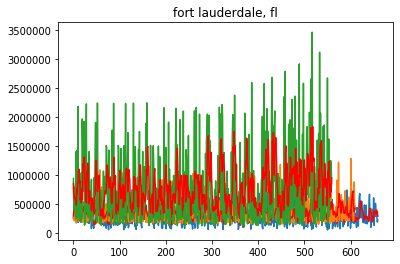

In [67]:
arima_pred(df)